# Intro

## Load

### Standards

In [1]:
import os, sys, pickle
import numpy as np
from tqdm.notebook import trange, tqdm
import re

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


### Homemade modules

In [3]:
from tesste import tesste
from ppp import ppp
from readers_and_converters import file2text, text2dict, text2vec

## Stoopid infos

In [4]:
L_SDGS=17

# Energy

## Folders

In [5]:
main_folder='./chatgpt_summaries/'

In [6]:
e_folder=main_folder+'Energy/'

In [7]:
c_folders=os.listdir(e_folder)
c_folders.sort()

In [8]:
c_folders

['01_shell',
 '02_BP',
 '03_Harbour_Energy_PLC',
 '04_energeans',
 '05_ITHACA_ENERGY_PLC',
 '06_LSE_WG',
 '07_SERICA_ENERGY_PLC',
 '08_ASHTEAD_TECHNOLOGY_HOLDINGS_PLC',
 '10_DIVERSIFIED_ENERGY_COMPANY_PLC']

## Basics

In [9]:
energy_texts={}
for y in range(2015, 2024):
    energy_texts[str(y)]={}

In [10]:
for i, c_folder in enumerate(tqdm(c_folders)):
    files=os.listdir(e_folder+c_folder)
    files.sort()
    for file in tqdm(files, desc=c_folder, leave=False):
        year=file[:4]
        #print(year)
        energy_texts[year][c_folder]=file2text(e_folder+c_folder+'/'+file)
    

  0%|          | 0/9 [00:00<?, ?it/s]

01_shell:   0%|          | 0/9 [00:00<?, ?it/s]

02_BP:   0%|          | 0/9 [00:00<?, ?it/s]

03_Harbour_Energy_PLC:   0%|          | 0/2 [00:00<?, ?it/s]

04_energeans:   0%|          | 0/6 [00:00<?, ?it/s]

05_ITHACA_ENERGY_PLC:   0%|          | 0/2 [00:00<?, ?it/s]

06_LSE_WG:   0%|          | 0/5 [00:00<?, ?it/s]

07_SERICA_ENERGY_PLC:   0%|          | 0/5 [00:00<?, ?it/s]

08_ASHTEAD_TECHNOLOGY_HOLDINGS_PLC:   0%|          | 0/3 [00:00<?, ?it/s]

10_DIVERSIFIED_ENERGY_COMPANY_PLC:   0%|          | 0/5 [00:00<?, ?it/s]

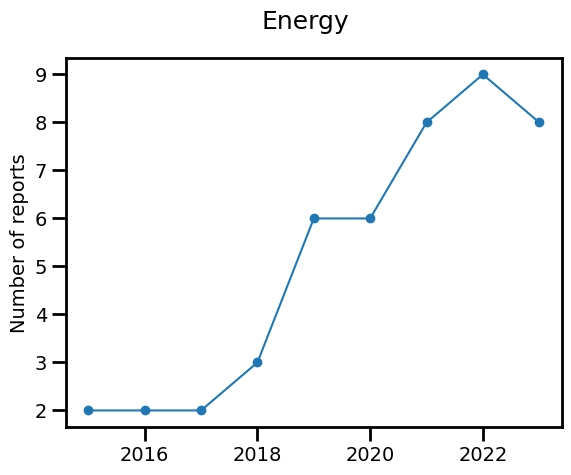

In [11]:
plt.plot(range(2015, 2024), [len(energy_texts[year].keys()) for year in energy_texts.keys()], marker='o')
plt.ylabel('Number of reports', fontsize=14)
plt.suptitle('Energy', fontsize=18)
plt.show()

## Binary analysis

In [12]:
energy_bi={}
for key in tqdm(energy_texts.keys()):
    s_keys=list(energy_texts[key].keys())
    n_docs=len(s_keys)
    aux=np.zeros((n_docs, L_SDGS), dtype=int)
    for i, s_key in enumerate(tqdm(s_keys, leave=False)):
        aux[i]=text2vec(energy_texts[key][s_key])
    energy_bi[key]=aux
    

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [13]:
[np.sum(np.sum(energy_bi[key], axis=0)>0) for key in energy_bi.keys()]

[15, 16, 16, 16, 17, 17, 17, 17, 17]

Not all SDGs are covered at least one time in each report.

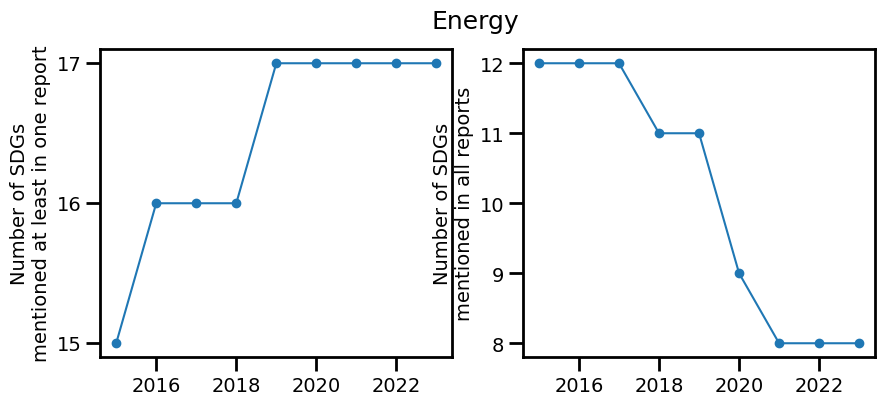

In [33]:
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axs[0].plot(range(2015, 2024), [np.sum(np.sum(energy_bi[key], axis=0)>0) for key in energy_bi.keys()], marker='o')
axs[0].set_ylabel('Number of SDGs\nmentioned at least in one report', fontsize=14)
axs[0].set_yticks(np.arange(15, 18, dtype=int))


axs[1].plot(range(2015, 2024), [np.sum(np.sum(energy_bi[key], axis=0)==energy_bi[key].shape[0]) for key in energy_bi.keys()], marker='o')
axs[1].set_ylabel('Number of SDGs\nmentioned in all reports', fontsize=14)
axs[1].set_yticks(np.arange(8, 13, dtype=int))
plt.suptitle('Energy', fontsize=18)
plt.show()

In [32]:
energy_bi['2015']

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]])